In [1]:
import pandas as pd
import numpy as np
import os, glob
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from datetime import datetime
from datetime import timedelta

In [6]:
os.chdir('/data/dhence/a/pborse2/inputdata')
peakdis = [pd.read_csv(i) for i in glob.glob("*.csv")]
peakdis = [peakdis[1],peakdis[-1]]

In [7]:
peakdis

[      Unnamed: 0        date  USGS:03337100-peak q
 0              0  2001-12-24                  2.70
 1              1  2001-12-25                  2.70
 2              2  2001-12-26                  2.70
 3              3  2001-12-27                  2.70
 4              4  2001-12-28                  2.50
 ...          ...         ...                   ...
 7583        7583  2022-09-28                  2.09
 7584        7584  2022-09-29                  2.09
 7585        7585  2022-09-30                  2.09
 7586        7586  2022-10-01                  2.09
 7587        7587  2022-10-02                  2.09
 
 [7588 rows x 3 columns],
       Unnamed: 0        date  USGS:03337000-peak q
 0              0  2001-01-01                  2.00
 1              1  2001-01-02                  2.00
 2              2  2001-01-03                  2.00
 3              3  2001-01-04                  2.00
 4              4  2001-01-05                  3.40
 ...          ...         ...       

In [8]:
for i in peakdis:
    i['date'] = pd.to_datetime(i['date'])
    i=i.drop('Unnamed: 0',axis=1,inplace=True)

In [9]:
peakdis = [i[(i['date'].dt.month>=4) & (i['date'].dt.month<=11)] for i in peakdis]

In [10]:
for i in peakdis:
    i= i.set_index('date',inplace=True)
for i in peakdis:
    i.rename(columns={i.columns[0]:'peak dis'}, inplace=True)

/tmp/ipykernel_171535/3740109170.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i.rename(columns={i.columns[0]:'peak dis'}, inplace=True)
/tmp/ipykernel_171535/3740109170.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i.rename(columns={i.columns[0]:'peak dis'}, inplace=True)


In [57]:
len(np.where(np.isnan(peakdis[1]['peak dis']))[0])

846

In [11]:
df = pd.concat(peakdis,axis=0).fillna(0)
meandis = df.groupby(df.index.date).mean()

In [12]:
meandis

,peak dis
2001-04-01,12.000
2001-04-02,2.200
2001-04-03,2.200
2001-04-04,2.600
2001-04-05,4.500
...,...
2022-09-28,2.405
2022-09-29,2.445
2022-09-30,2.445
2022-10-01,2.445


In [13]:
from ipynb.fs.defs.Mosquitodataset1_Yearlybatchdata import yearlyfile, batch1, batchdf1

In [16]:
mos = yearlyfile("Mosquito yearly.xlsx",'U-C')[0]
mosyr = yearlyfile("Mosquito yearly.xlsx",'U-C')[1]
batch = batch1(mosyr,mos)
batchdf = batchdf1(mos)

In [18]:
batchdf

,batches,date,datemd
0,1,2002-07-11,7/11
1,2,2002-07-16,7/16
2,3,2002-07-23,7/23
3,3,2002-07-24,7/24
4,1,2002-07-31,7/31
...,...,...,...
151,1,2020-10-01,10/1
152,1,2020-10-15,10/15
153,1,2021-07-22,7/22
154,2,2021-08-26,8/26


In [19]:
batch1 = batchdf[batchdf['batches']==1]
batch25 =  batchdf[(batchdf['batches']>=2)&(batchdf['batches']<=5)]
batch6 = batchdf[batchdf['batches']>=6]

In [88]:
lagdis=[]
for i in batch1['date']:
    lag = [meandis[meandis.index==i-timedelta(j)]['peak dis'].values[0] for j in range(15,29)]
    lagdis.append(lag)

/data/keeling/a/pborse2/miniconda3/envs/geo/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [89]:
lagdisdf = pd.DataFrame(lagdis)
lagdisdf.columns = ['lagdis-'+str(i) for i in range(1,15)]

In [84]:
lagdisdf.columns.values

array(['lagdis-1', 'lagdis-2', 'lagdis-3', 'lagdis-4', 'lagdis-5',
       'lagdis-6', 'lagdis-7', 'lagdis-8', 'lagdis-9', 'lagdis-10',
       'lagdis-11', 'lagdis-12', 'lagdis-13', 'lagdis-14'], dtype=object)

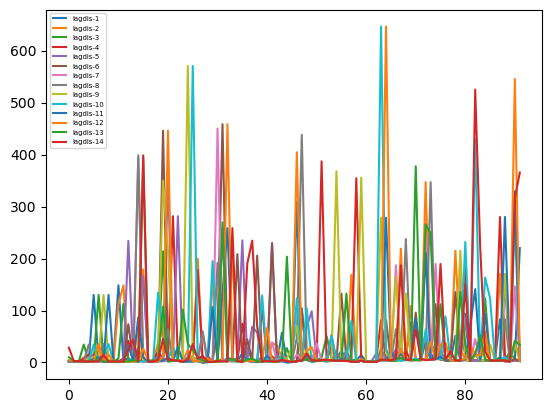

In [90]:
import hvplot.pandas
lagdisdf.plot()
plt.legend(fontsize=5)

<AxesSubplot:>

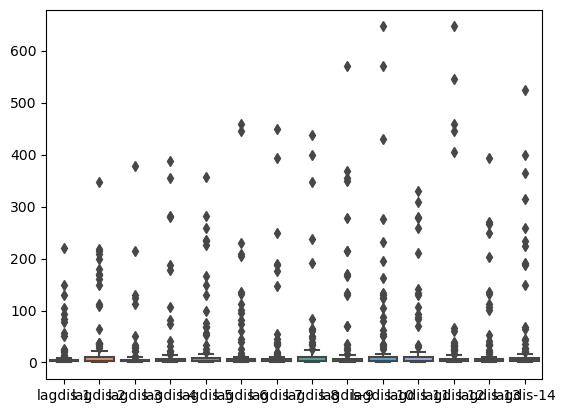

In [91]:
sns.boxplot(lagdisdf)

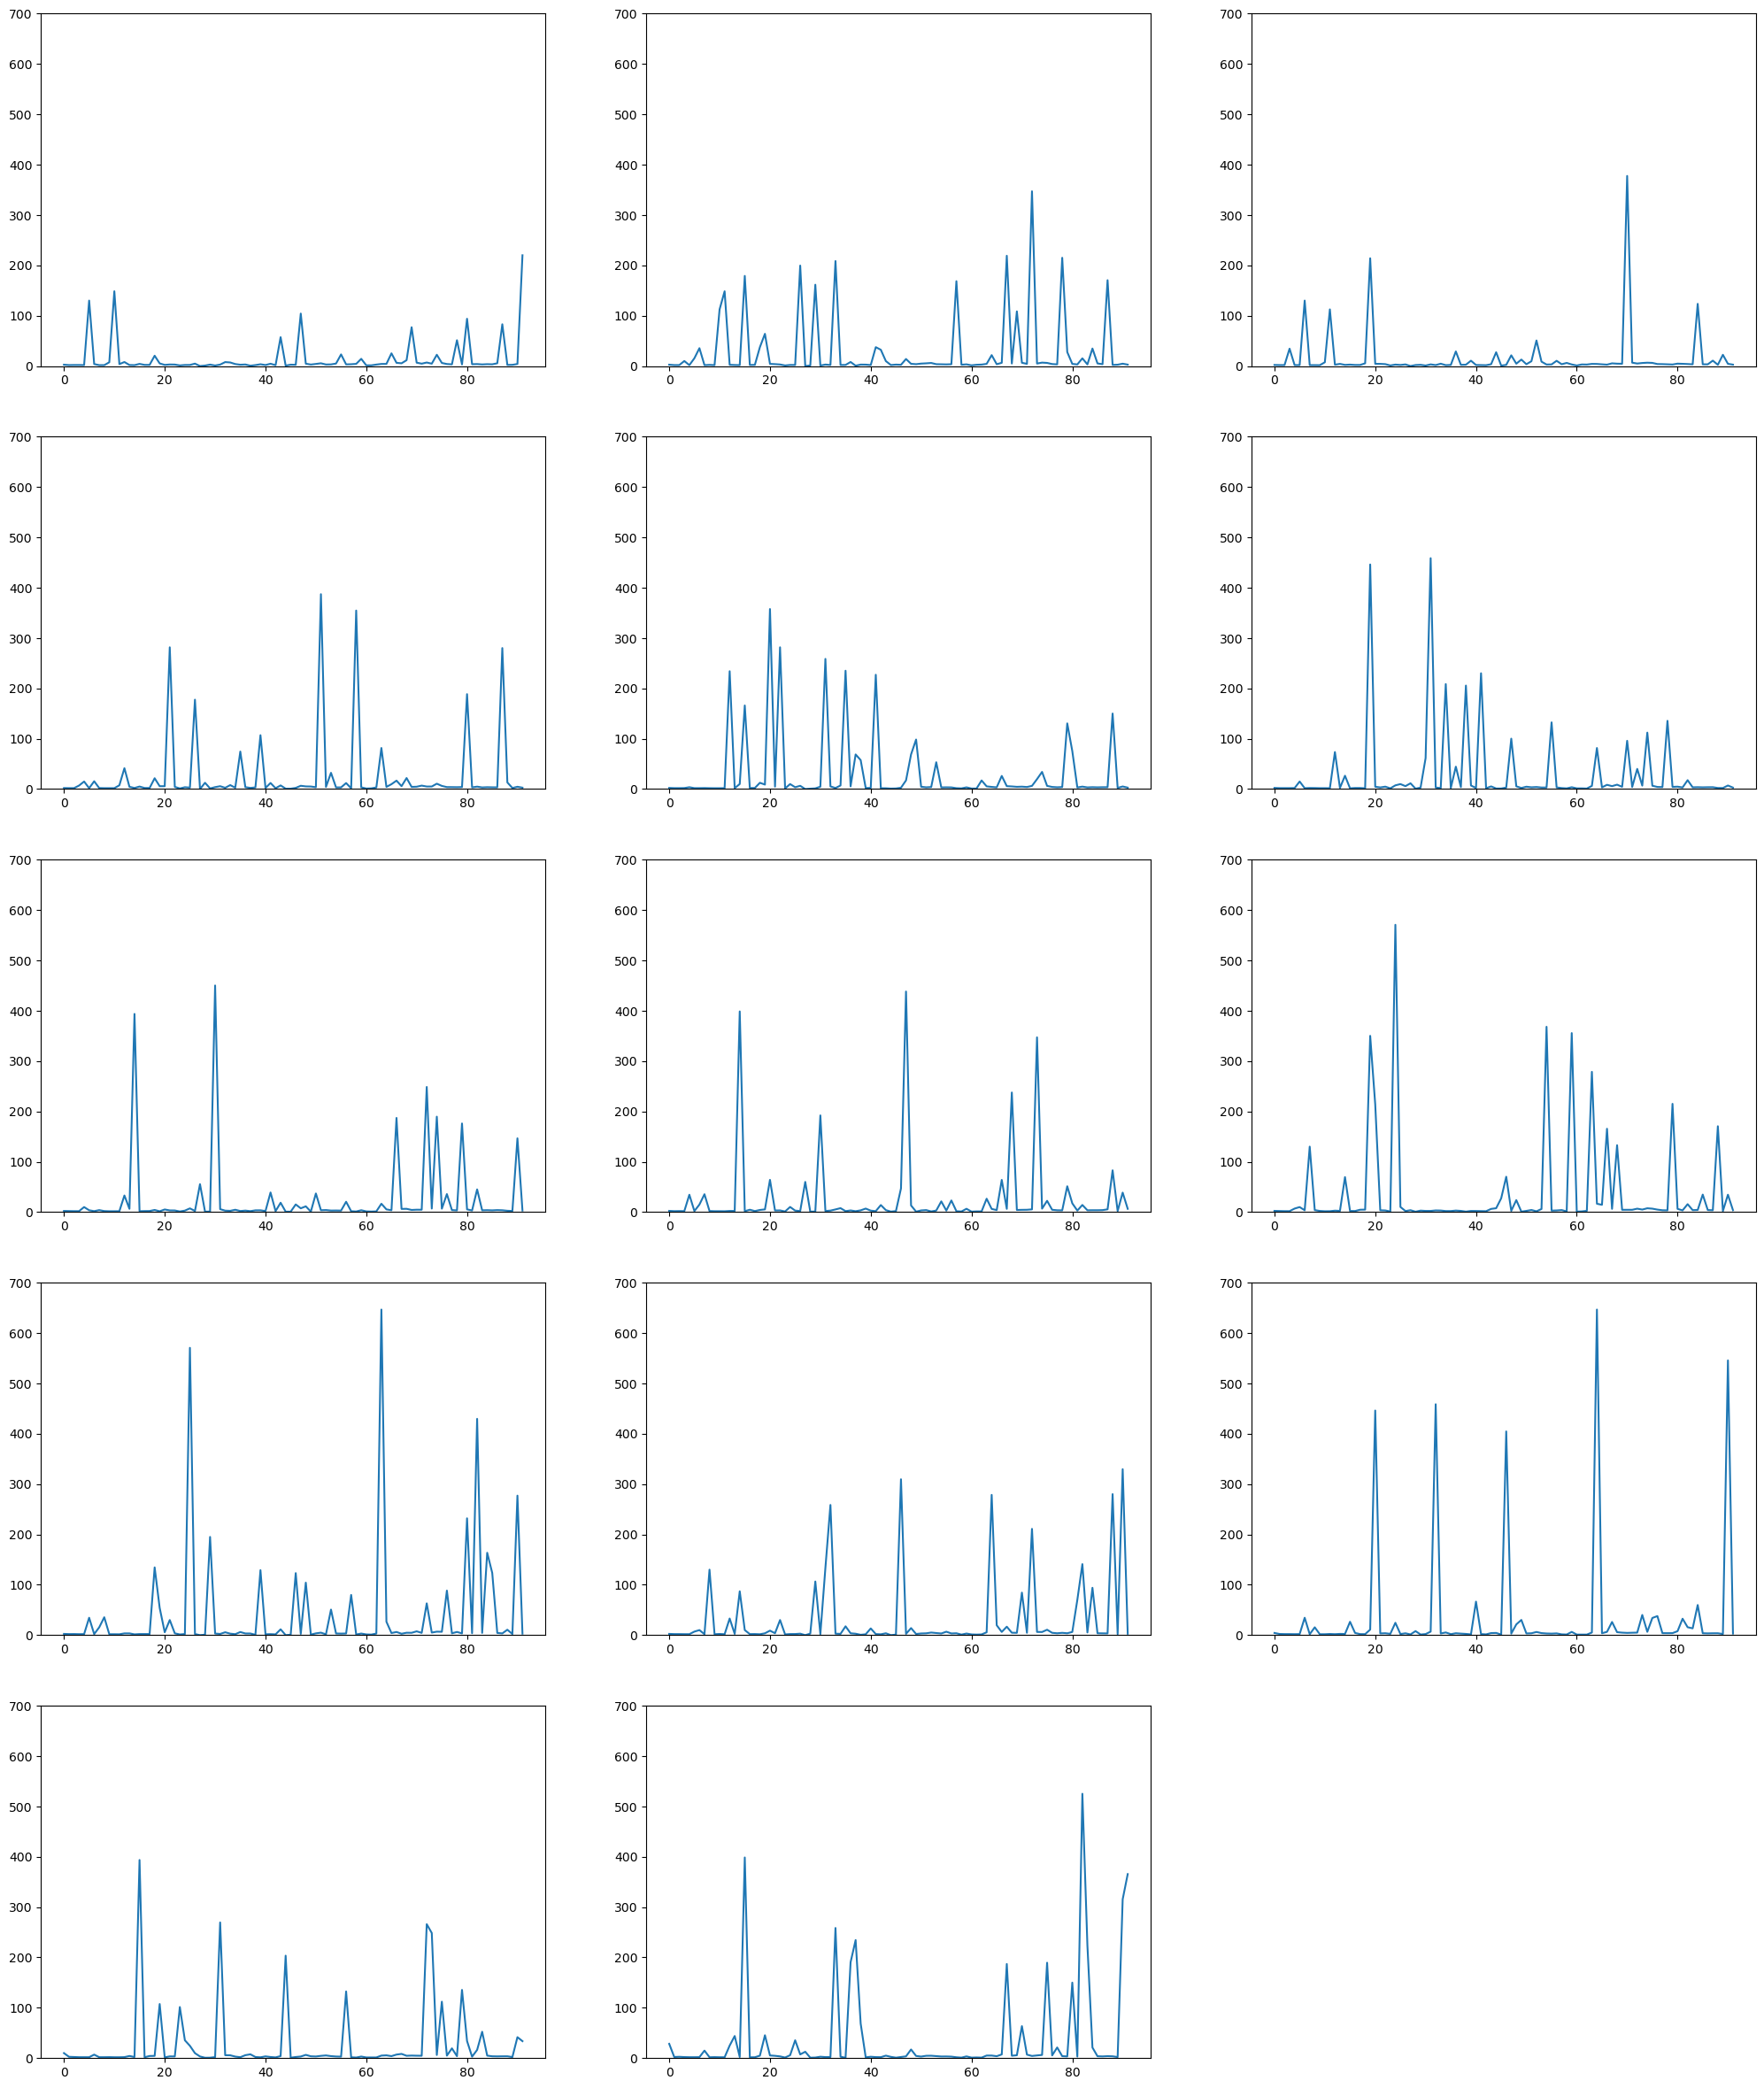

In [102]:
s=0
figure(figsize=(25,30))

for i in lagdisdf.columns:
    s=s+1
    plt.subplot(5, 3, s)
    plt.plot(lagdisdf[i])
    plt.ylim(0,700)